## Goal : 畫出資料輸入的MVP(用 Gadio 套件)

### 讓 Persona.csv的資料可以直接從介面新增

### 先 Define 功能

!pip install gradio

In [2]:
import gradio as gr
import csv

# 讀csv
def load_csv(file):
    with open('persona.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        data = "\n".join([", ".join(row) for row in reader])
    return data

# 幫csv加資料
def add_data(name, interest):
    with open('persona.csv', mode='a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([name, interest])

### 畫介面

In [3]:
# Gradio UI 接口
def add_to_csv(name, interest):
    add_data(name, interest)
    updated_csv = load_csv('persona.csv')
    return f"已将 {name} 的兴趣添加到 CSV 文件中。\n\n更新后的 CSV 数据为：\n{updated_csv}"

# 创建 Gradio 界面
iface = gr.Interface(
    fn=add_to_csv,
    inputs=["text", "text"],
    outputs=gr.Dataframe(label="CSV内容"),
    title="增加你的資料的csv中!",
    description="左邊填寫完送出，右邊即刻更新",
    theme="default"
)

# 启动 Gradio 界面
iface.launch()

Running on local URL:  http://127.0.0.1:7866
IMPORTANT: You are using gradio version 4.22.0, however version 4.29.0 is available, please upgrade.
--------

To create a public link, set `share=True` in `launch()`.


### 成功一半，先讀出csv檔

In [6]:
import gradio as gr
import pandas as pd

def load_csv(file):
    # 读取CSV文件并返回DataFrame
    data = pd.read_csv('persona.csv')
    return data  # 返回DataFrame对象

# 定义Gradio界面
inputs = gr.File(label="选择CSV文件")  # 文件输入
output = gr.Dataframe(label="CSV内容")  # DataFrame输出

# 创建Gradio界面
app = gr.Interface(load_csv, inputs, output, title="CSV Viewer")

# 启动Gradio界面
app.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [32]:
import csv

def add_data():
    name = input("Enter name: ")
    key = input("Enter key: ")
    
    with open('persona.csv', 'a', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['id', '標籤']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writerow({'id': name, '標籤': key})

# 执行添加数据函数
add_data()


Enter name: Irene
Enter key: 美食、音樂、科技


In [45]:
df = pd.read_csv('persona.csv')

# Display the first few rows of the dataframe to understand its structure
df

,id,標籤
0,Max Cooper,"藝術愛好者, 運動愛好者, 探索未知領域"
1,Emily Clark,交流和建立連結、音樂、科技、旅行
2,Liam Thompson,創造力、挑戰傳統、藝術、創業、社會變革
3,Sophia Rodriguez,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長
4,Ethan Parker,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動
5,Ava Turner,廚藝愛好者、探索生活的各個方面、閱讀和了解不同文化背景的故事、分享笑容和快樂、尊重和包容每一個人
6,Noah Campbell,挑戰自我的精神、運動競技、數據分析和趨勢探索、成長和進步、持續學習和提升
7,Mia Foster,幫助他人、社區服務和慈善活動、心理諮詢、關愛和支持、創造正能量和愛
8,Lucas Barnes,創造力和想像力、設計、社會運動和改革、啟發他人、共同創建更美好的未來
9,Olivia Reed,學習和探索、科技、書法、知識的價值和貢獻、不斷學習和成長


### 製圖過程

In [55]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
df = pd.read_csv('persona.csv')

# Display the last few rows of the dataframe to see if the new data is inserted
df.tail()

,id,標籤
16,Ella Wright,網路行銷專家、SEO、社交媒體行銷、瑜珈、咖啡
17,Benjamin Cox,程式設計師、桌遊、問題解決
18,Lily Morgan,心理學、人類行為、情感、花草
19,Samuel Carter,運動科學家、健身、廚藝、烹飪
20,Irene,美食、音樂、科技


In [48]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
df['標籤'] = df['標籤'].str.replace('、', ',').str.split(',')

# 創建關鍵字與ID之間的映射對照表
keyword_to_ids = defaultdict(list)
id_to_keywords = defaultdict(list)

for index, row in df.iterrows():
    id = row['id']
    id_to_keywords[id].append
    keywords = [keyword.strip() for keyword in row['標籤']]
    for keyword in keywords:
        keyword_to_ids[keyword].append(id)

In [49]:
keyword_to_ids

defaultdict(list,
            {'藝術愛好者': ['Max Cooper'],
             '運動愛好者': ['Max Cooper'],
             '探索未知領域': ['Max Cooper'],
             '交流和建立連結': ['Emily Clark'],
             '音樂': ['Emily Clark', 'Irene'],
             '科技': ['Emily Clark', 'Olivia Reed', 'Irene'],
             '旅行': ['Emily Clark', 'Jack Murphy'],
             '創造力': ['Liam Thompson'],
             '挑戰傳統': ['Liam Thompson'],
             '藝術': ['Liam Thompson'],
             '創業': ['Liam Thompson'],
             '社會變革': ['Liam Thompson'],
             '冒險和探索': ['Sophia Rodriguez'],
             '自然愛好者': ['Sophia Rodriguez'],
             '社區建設': ['Sophia Rodriguez'],
             '志願服務': ['Sophia Rodriguez'],
             '學習和成長': ['Sophia Rodriguez'],
             '音樂愛好者': ['Ethan Parker'],
             '彈奏吉他': ['Ethan Parker'],
             '創作音樂': ['Ethan Parker'],
             '動物愛護者': ['Ethan Parker'],
             '參與動物保護活動': ['Ethan Parker'],
             '廚藝愛好者': ['Ava Turner'],
             '探索生活

In [50]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
dic_df = pd.read_csv('index2.csv')

# Display the first few rows of the dataframe to understand its structure
dic_df.head()

,index,key
0,音樂,彈奏吉他
1,音樂,創作音樂
2,音樂,音樂愛好者
3,音樂,吉他
4,音樂,鋼琴


In [51]:
# 創建關鍵字與index之間的映射對照表
key_to_index = defaultdict(list)

for index, row in dic_df.iterrows():
    key = row['key']
    index_val = row['index']
    key_to_index[key].append(index_val)

In [52]:
key_to_index

defaultdict(list,
            {'彈奏吉他': ['音樂'],
             '創作音樂': ['音樂'],
             '音樂愛好者': ['音樂'],
             '吉他': ['音樂'],
             '鋼琴': ['音樂'],
             '音樂家': ['音樂'],
             '運動愛好者': ['運動'],
             '冒險和探索': ['運動'],
             '登山': ['運動'],
             '攀岩': ['運動'],
             '健身': ['運動', '運動'],
             '瑜珈': ['運動'],
             '咖啡': ['運動'],
             '運動科學家': ['運動'],
             '閱讀和了解不同文化背景的故事': ['文學'],
             '科幻小說': ['文學'],
             '科技': ['資訊'],
             '軟體工程師': ['資訊'],
             '應用程式開發': ['資訊'],
             '程式設計師': ['資訊'],
             '問題解決': ['資訊'],
             '數據分析': ['資訊'],
             'SEO': ['資訊'],
             '網路行銷專家': ['資訊'],
             '社交媒體行銷': ['資訊'],
             '交流和建立連結': ['軟技能'],
             '挑戰傳統': ['軟技能'],
             '創業': ['軟技能'],
             '社會變革': ['軟技能'],
             '分享笑容和快樂': ['軟技能'],
             '尊重和包容每一個人': ['軟技能'],
             '心理諮詢': ['軟技能'],
             '關愛和支持': ['軟技能'

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
T = nx.Graph()

# 加點
for id in id_to_keywords:
    T.add_node(id, type='id')
for key in key_to_index:
    T.add_node(keyword, type='keyword')
for index in key_to_index:
    T.add_node(index, type="index")

# 加邊
for keyword, ids in keyword_to_ids.items():
    for id in ids:
        T.add_edge(id, keyword)
        
for key, index in key_to_index.items():
    for index in index:
        T.add_edge(index, key)

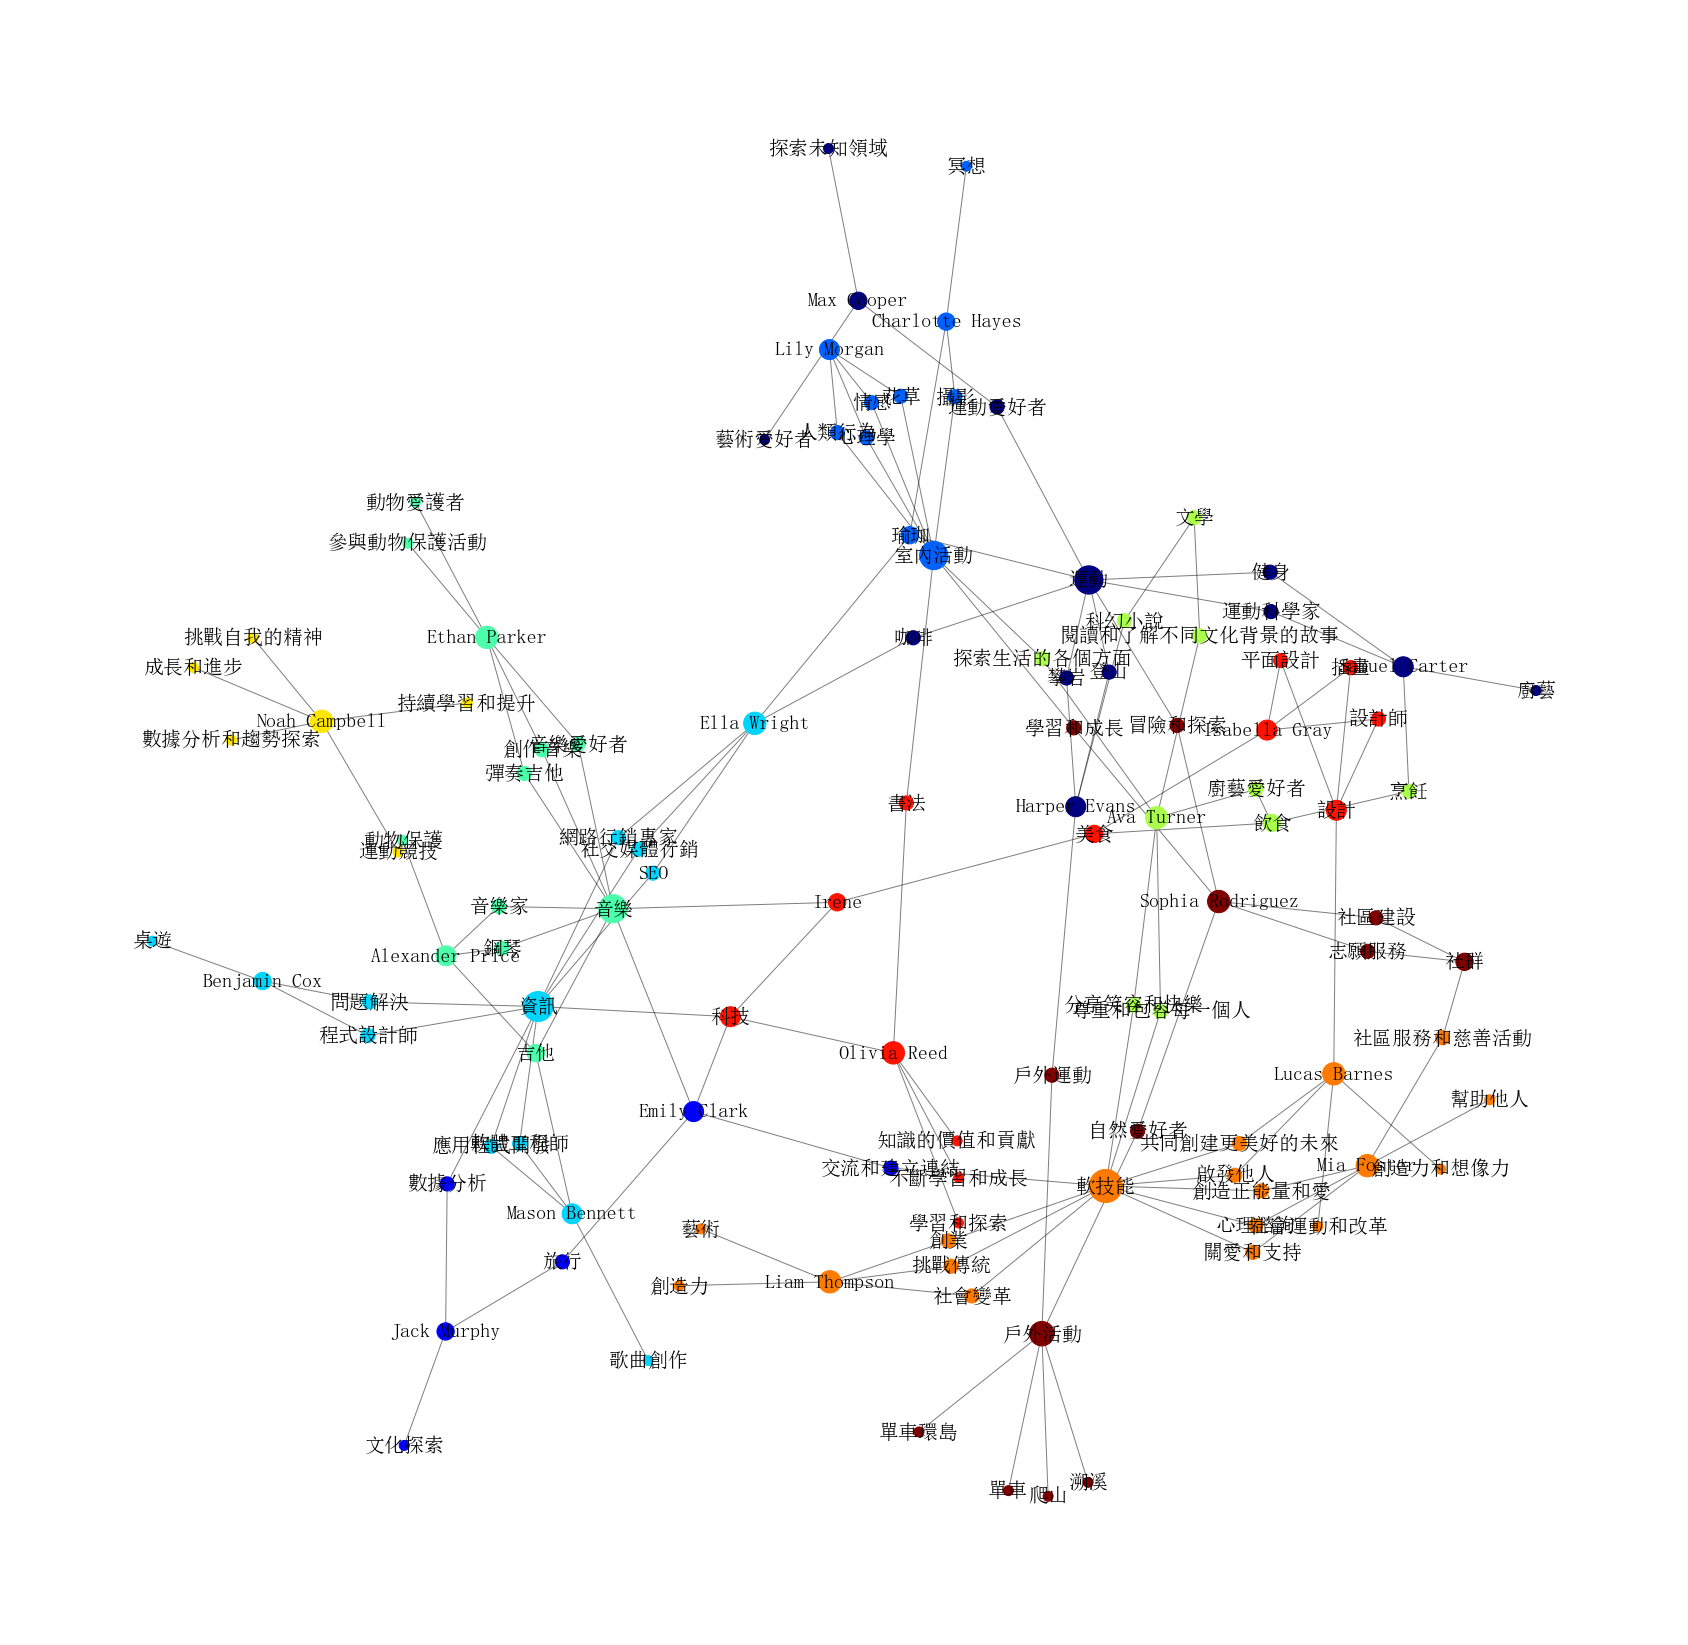

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(T)

community_colors = {node: partition[node] for node in T.nodes()}
values = [community_colors[node] for node in T.nodes()]

node_sizes = [100 * T.degree(node) for node in T.nodes()]

pos = nx.spring_layout(T, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(T, pos, alpha=0.5)
nx.draw_networkx_nodes(T, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(T, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()